In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
import os.path as osp
from tqdm.auto import tqdm
from glob import glob
from analysis.mem_ana import load_results#, parse_line_to_float
from analysis.utils import module_reload
from analysis.plot_matplotlib import plot_hist

In [6]:
src_path = "/nfs/dust/ilc/user/bliewert/mem_integrate"
log_path = f"{src_path}/log"
log_files = glob(f'{log_path}/*.out')

In [7]:
log_files

['/nfs/dust/ilc/user/bliewert/mem_integrate/log/227.out',
 '/nfs/dust/ilc/user/bliewert/mem_integrate/log/4.out',
 '/nfs/dust/ilc/user/bliewert/mem_integrate/log/240.out',
 '/nfs/dust/ilc/user/bliewert/mem_integrate/log/139.out',
 '/nfs/dust/ilc/user/bliewert/mem_integrate/log/98.out',
 '/nfs/dust/ilc/user/bliewert/mem_integrate/log/34.out',
 '/nfs/dust/ilc/user/bliewert/mem_integrate/log/183.out',
 '/nfs/dust/ilc/user/bliewert/mem_integrate/log/150.out',
 '/nfs/dust/ilc/user/bliewert/mem_integrate/log/44.out',
 '/nfs/dust/ilc/user/bliewert/mem_integrate/log/54.out',
 '/nfs/dust/ilc/user/bliewert/mem_integrate/log/214.out',
 '/nfs/dust/ilc/user/bliewert/mem_integrate/log/245.out',
 '/nfs/dust/ilc/user/bliewert/mem_integrate/log/64.out',
 '/nfs/dust/ilc/user/bliewert/mem_integrate/log/74.out',
 '/nfs/dust/ilc/user/bliewert/mem_integrate/log/84.out',
 '/nfs/dust/ilc/user/bliewert/mem_integrate/log/94.out',
 '/nfs/dust/ilc/user/bliewert/mem_integrate/log/10.out',
 '/nfs/dust/ilc/user/blie

In [9]:
log = log_files[0]
print(log)

/nfs/dust/ilc/user/bliewert/mem_integrate/log/227.out


In [34]:
pssampling_zhh = { 'given': [], 'found': [], 'frac': [] }
pssampling_zzh = { 'given': [], 'found': [], 'frac': [] }
keys = ['zzh', 'zhh']

line_marker = 'PS points'
switch_marker = 'result ='

with open(log, 'r') as file:
    Lines = file.readlines()
    
    key_idx = 0
    for line in tqdm(Lines):
        # 1. BKG, 2. SIG
        if line.startswith(switch_marker):
            key_idx += 1
            continue
        
        if line.startswith(line_marker):
            numbers = re.findall(r'\d+', line)
            out = pssampling_zzh if key_idx == 0 else pssampling_zhh
            
            given = int(numbers[0])
            found = int(numbers[1])
            
            out['given'].append(given)
            out['found'].append(found)
            out['frac'].append(found/given)
        
pssampling_zzh = pd.DataFrame(pssampling_zzh)
pssampling_zhh = pd.DataFrame(pssampling_zhh)

100%|██████████| 196/196 [00:00<00:00, 230340.03it/s]


In [35]:
len(pssampling_zzh), len(pssampling_zhh)

(143, 23)

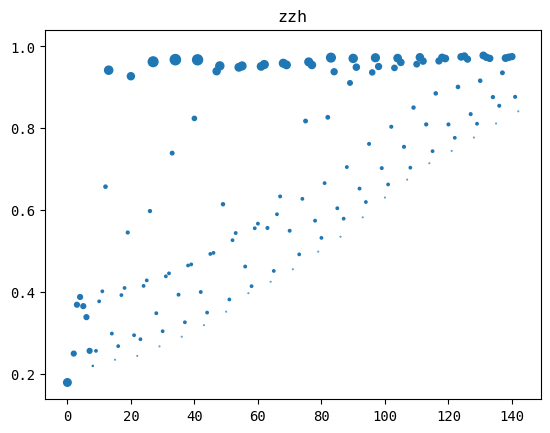

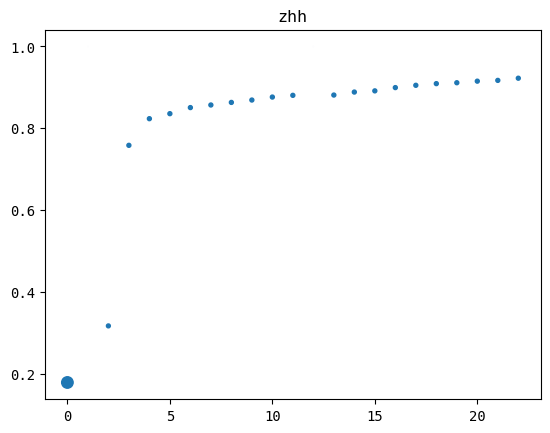

In [44]:
for i, sampling in enumerate([pssampling_zzh, pssampling_zhh]):
    tot = np.sum(sampling['given'])
    factor = len(sampling)*10
    
    plt.scatter(x=np.arange(len(sampling)), y=sampling['frac'], s=factor*sampling['given']/tot)
    plt.title(keys[i])
    plt.show()

In [17]:
df

,zzh_given,zzh_found,zzh_frac,zhh_given,zhh_found,zhh_frac
